### Please answer below questions using both SQL and Python
1. How many products people usually order?
2. Which products are ordered the most?
3. Which product is most likely to be added first in cart?
4. What is the time at which people usually order products?

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
aisles = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")
order_products = pd.read_csv("order_products.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")

In [5]:
print(aisles.shape)
print(departments.shape)
print(order_products.shape)
print(orders.shape)
print(products.shape)

(134, 2)
(21, 2)
(33819106, 3)
(3421083, 6)
(49688, 4)


In [6]:
aisles_products = pd.merge(aisles, products, on = "aisle_id")
aisles_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49688 entries, 0 to 49687
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   aisle_id       49688 non-null  int64 
 1   aisle          49688 non-null  object
 2   product_id     49688 non-null  int64 
 3   product_name   49688 non-null  object
 4   department_id  49688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.3+ MB


In [7]:
ord_prod_ord = pd.merge(order_products, orders, on = "order_id")

In [8]:
ais_prod_depart = pd.merge(aisles_products, departments, on="department_id")

In [9]:
new = pd.merge(ais_prod_depart, ord_prod_ord, on = "product_id")

1. How many products people usually order?

In [22]:
order_products.groupby('order_id')['order_id'].value_counts().median() 

8.0

In [20]:
order_products.groupby('order_id')['order_id'].size().median()  #计数

8.0

In [21]:
new.groupby(['user_id'])['order_id'].value_counts().median()

8.0

People usually buy 8 products.

一个user_id可能一次会下很多order,查看一个order里有多少product

mode 众数 

商业中一个商业问题，转换成技术问题，focus on technology

一个人order里面distinct的数目.再做中位数，或者平均数就可以知道了。

select count(product_id)

from new

group by order_id

order by count(product_id)

对 order_id 进行分类，计数product_id,降序排列。




做完group by count， 以后再做众数.
value_counts() 出来时一个dtaframe，不容易处理数据

2. Which products are ordered the most?

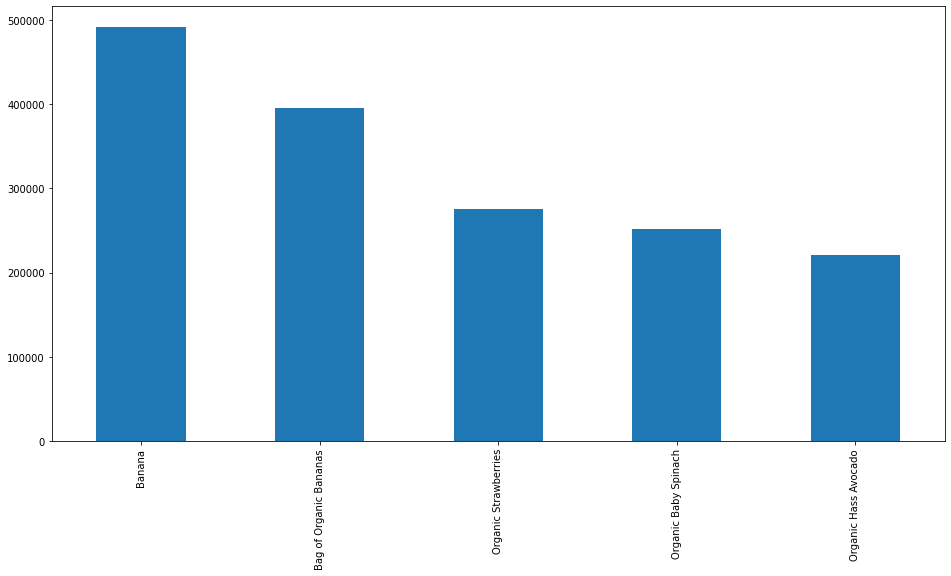

In [14]:
plt.figure(figsize=(16,8))
new['product_name'].value_counts().head(5).plot.bar()
plt.show()

Banana is the product that customers order most.

3. Which product is most likely to be added first in cart?

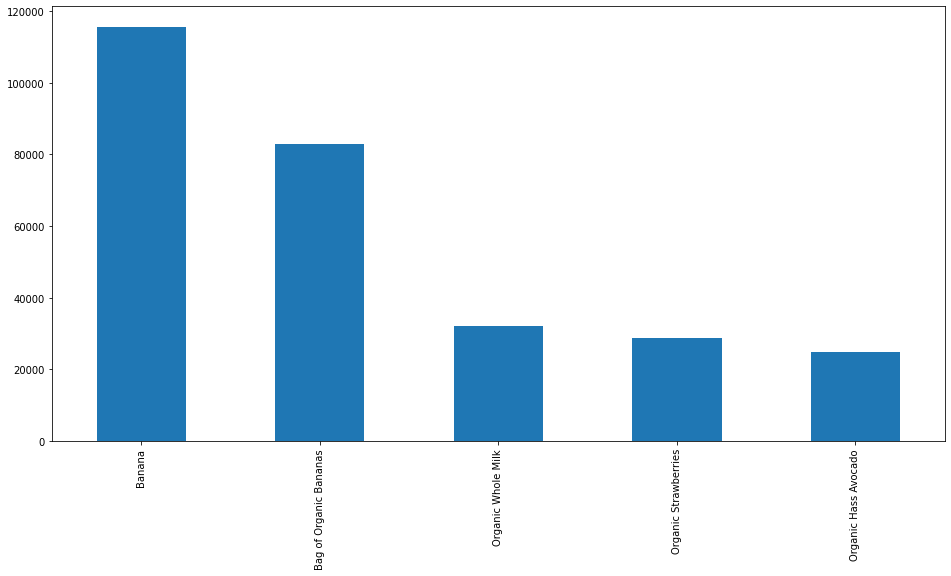

In [15]:
# 满足 add_to_cart_order= 1 的 max(count(product_id))
new2 = new[new['add_to_cart_order'] <= 1]

plt.figure(figsize=(16,8))
new2['product_name'].value_counts().head(5).plot.bar()
plt.show()

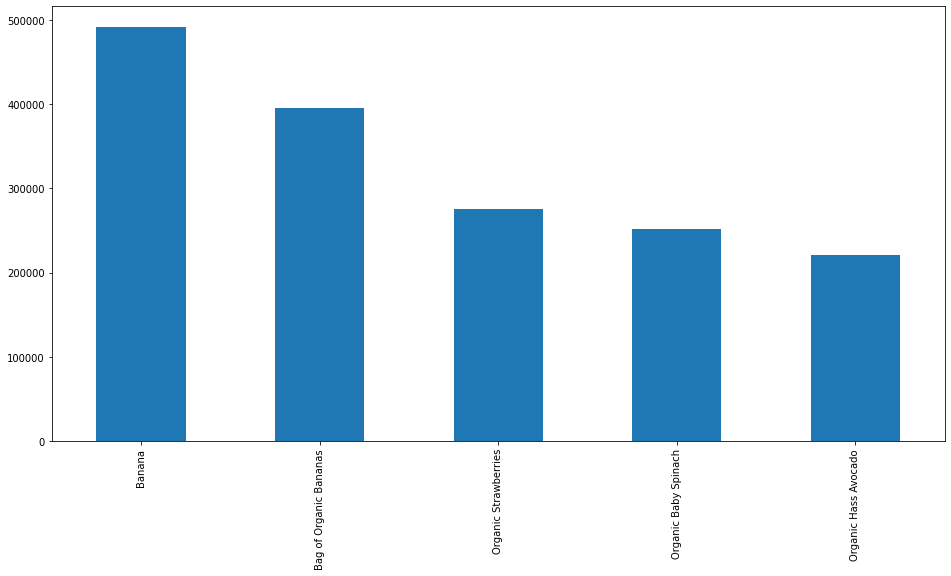

In [16]:
plt.figure(figsize=(16,8))
new['product_name'].value_counts().head(5).plot.bar()
plt.show()

Banana is most likely to be added first in cart. 

4. What is the time at which people usually order products?


In [33]:
# order_dow
new['order_dow'].describe

<bound method NDFrame.describe of 0           0
1           0
2           2
3           2
4           5
           ..
33819101    1
33819102    2
33819103    1
33819104    1
33819105    4
Name: order_dow, Length: 33819106, dtype: int64>

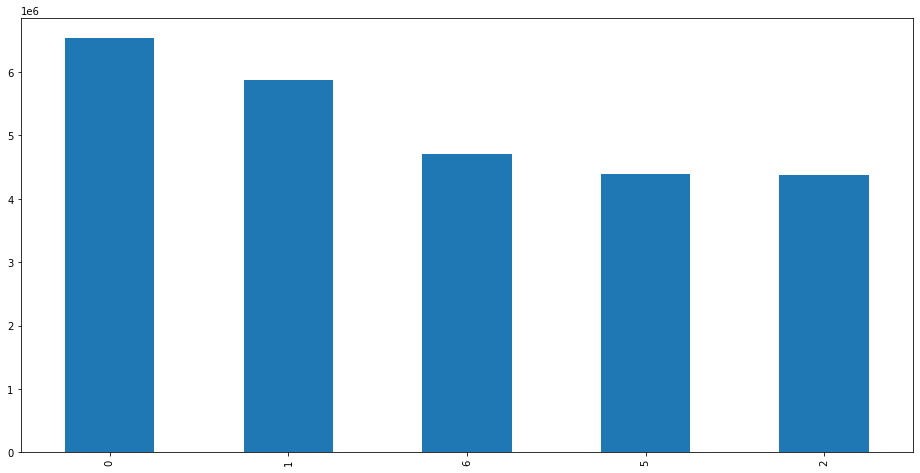

In [34]:
plt.figure(figsize=(16,8))
new['order_dow'].value_counts().head(5).plot.bar()
plt.show()

People usually order on Sunday.

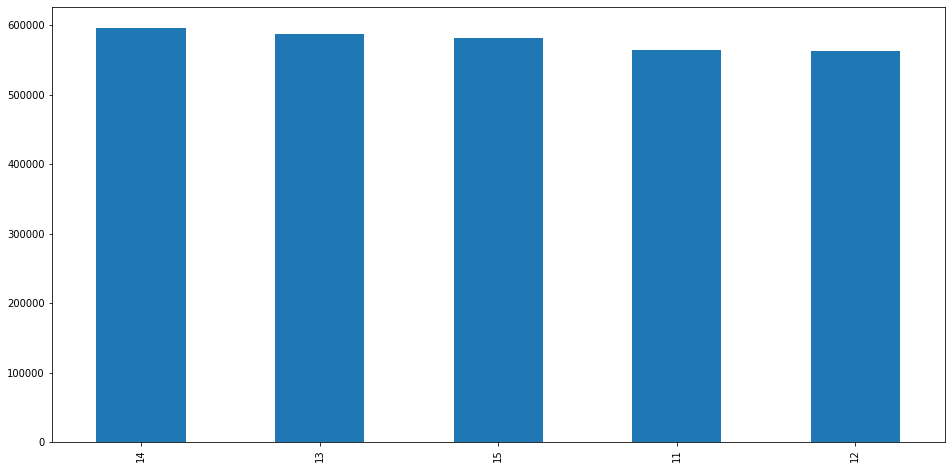

In [35]:
new3 = new[new['order_dow'] == 0]
plt.figure(figsize=(16,8))
new3['order_hour_of_day'].value_counts().head(5).plot.bar()
plt.show()

People usually order on Sunday at 14:00 O'clock.